<a href="https://colab.research.google.com/github/OpenMLCo/Yolo-OCR/blob/main/Training/Training_yolo_cedula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# moount google drive

In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,706 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# install darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15376, done.
remote: Total 15376 (delta 0), reused 0 (delta 0), pack-reused 15376
Receiving objects: 100% (15376/15376), 14.01 MiB | 4.03 MiB/s, done.
Resolving deltas: 100% (10339/10339), done.
Checking out files: 100% (2050/2050), done.


In [ ]:
!ls

 BD_ADR_comp.csv
 BD_ADR.csv
 cedu1.jpeg
 ceduj.jpeg
 cedu.jpeg
 cedulas.zip
 ceduYohan.jpeg
 classes.txt
 Codes
 darknet
'Diccionario de Datos Gestion de Proyectos.xlsx'
'Diccionario de Datos Perfiles de Proyectos.xlsx'
 files
 files2
 files2.zip
 images_daniel_labeled.zip
 images_daniel.zip
 images_julian
 images_julian.zip
 Images_label_julian
 Images_label_julian.zip
 licYohan.jpeg
 Revision_Docs.xlsx
 Verficiacion_Documentos.ipynb
 Yolo
 Yolotest.txt
 Yolotrain.txt


In [ ]:
cd darknet/

/content/drive/.shortcut-targets-by-id/1_z8w7CZ3SZu4UJtLhFG9UJSJecURArDV/ADR_OCR/ARchivosBios/ARchivosBios/darknet


In [ ]:
# para GPU
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile
!sed -i 's/AVX=0/AVX=1/g' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/g' Makefile

# para cpu
# #!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
# !sed -i 's/AVX=0/AVX=1/g' Makefile
# !sed -i 's/LIBSO=0/LIBSO=1/g' Makefile
# #!sed -i 's/GPU=0/GPU=1/g' Makefile
# #!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
# #!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -ffp-contract=fast -mavx -mavx2 -msse3 -msse4.1 -msse4.2 -msse4a -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guar

# copy training data to container folder

### normal training

In [ ]:
!cp /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/cedulas.zip /content/darknet/data

In [ ]:
%cd /content/darknet/data

/content/darknet/data


In [ ]:
ls

9k.tree      dog.jpg      horses.jpg                openimages.names
cedulas.zip  eagle.jpg    imagenet.labels.list      person.jpg
coco9k.map   giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names   goal.txt     labels/                   voc.names


In [ ]:
!unzip 'cedulas.zip' -d /content/darknet/data

Archive:  cedulas.zip
  inflating: /content/darknet/data/images_labeled/1000_cedulaRepresentante-3756_0.jpg  
  inflating: /content/darknet/data/images_labeled/1000_cedulaRepresentante-3756_0.txt  
  inflating: /content/darknet/data/images_labeled/1003_cedulaRepresentante-565_0.jpg  
  inflating: /content/darknet/data/images_labeled/1003_cedulaRepresentante-565_0.txt  
  inflating: /content/darknet/data/images_labeled/1005_cedulaRepresentante-291_0.jpg  
  inflating: /content/darknet/data/images_labeled/1005_cedulaRepresentante-291_0.txt  
  inflating: /content/darknet/data/images_labeled/1006_cedulaRepresentante-5661_0.jpg  
  inflating: /content/darknet/data/images_labeled/1006_cedulaRepresentante-5661_0.txt  
  inflating: /content/darknet/data/images_labeled/100_cedulaRepresentante-206_0.jpg  
  inflating: /content/darknet/data/images_labeled/100_cedulaRepresentante-206_0.txt  
  inflating: /content/darknet/data/images_labeled/1011_cedulaRepresentante-293_0.jpg  
  inflating: /conte

In [ ]:
ls images_labeled | wc -l

910


In [ ]:
!ls data_uso_celular/*.jpg | wc -l

1321


In [ ]:
# Import some librarie
import os
import random
import numpy as np
import matplotlib.pyplot as plt
# Read images' name
path_an='/content/darknet/data/'
path='images_labeled/'
names= [name for name in os.listdir(path_an+path) if name.endswith('.txt')]
print("Number of txt files:",len(names))
names_txt=names
names= [name for name in os.listdir(path_an+path) if name.endswith('.jpg')]
print("Number of images:",len(names))
names_jpg=names

Number of txt files: 455
Number of images: 455


In [ ]:
# Shuffle data names
#save_filestxt_path='/content/drive/MyDrive/Codes_Victoria_vision/Yolov4-tiny-MOT15-hands/'
save_filestxt_path = '/content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/'
random.shuffle(names)
random.shuffle(names)
random.shuffle(names)
random.shuffle(names)
random.shuffle(names)
# Splitting data names into train and test
train_names = names[:int(len(names)*0.9)]
random.shuffle(train_names)
random.shuffle(train_names)
test_names = names[int(len(names)*0.9):]
random.shuffle(test_names)
random.shuffle(test_names)
# Save training names
file1 = open(save_filestxt_path+"train.txt", "w")
for image in train_names:
  file1.write(path_an+path+image+"\n")
file1.close()
# Save test names
file1 = open(save_filestxt_path+"test.txt", "w")
for image in test_names:
  file1.write(path_an+path+image+"\n")
file1.close()

#Training yolo

In [ ]:
cd /content/darknet

/content/darknet


In [ ]:
!nvidia-smi

Thu Dec  2 15:20:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
## calculate anchors
!./darknet detector calc_anchors /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/obj.data -num_of_clusters 9 -width 512 -height 512

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0

 num_of_clusters = 9, width = 512, height = 512 
 read labels from 364 images 
 loaded 	 image: 364 	 box: 1452
 all loaded. 

 calculating k-means++ ...

 iterations = 23 


counters_per_class = 363, 363, 364, 362

 avg IoU = 80.58 % 

Saving anchors to the file: anchors.txt 
anchors =  45, 17,  73, 11, 109, 13,  74, 21, 125, 18, 106, 23, 149, 31, 232,112, 350,169
^C


In [ ]:
!./darknet detector train \
    /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/obj.data \
    /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/yolov4_custom.cfg \
    /content/drive/MyDrive/ARUS/pesos_yolov4/yolov4.conv.137 -dont_show -map    

# test yolo model

In [ ]:
#change paths!!!
%cd /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/darknet/
!chmod -R +777 /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/darknet

/content/drive/.shortcut-targets-by-id/1_z8w7CZ3SZu4UJtLhFG9UJSJecURArDV/ADR_OCR/ARchivosBios/ARchivosBios/darknet
chmod: cannot read directory '/content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/darknet/': Operation not permitted


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
#change paths here and darknet obj.data!!!
!./darknet detector test \
    /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/obj.data \
    /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/yolov4_custom.cfg \
    /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/yolov4_custom_best.weights \
    /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/ceduj.jpeg
  

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
^C


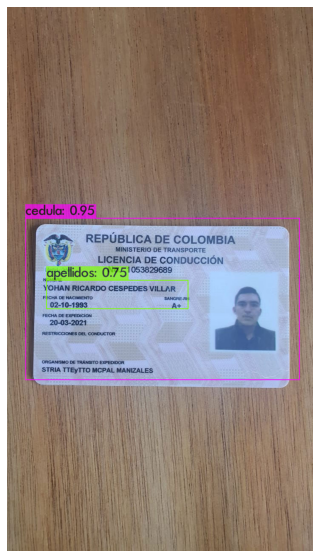

In [ ]:
imShow('predictions.jpg')

# extract bounding boxes

In [ ]:
%cd /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/darknet/
!chmod -R +777 /content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/darknet

/content/drive/.shortcut-targets-by-id/1_z8w7CZ3SZu4UJtLhFG9UJSJecURArDV/ADR_OCR/ARchivosBios/ARchivosBios/darknet


In [ ]:
# Extraer bounding boxes
import argparse
import os
import glob
import random
import darknet
import time
import cv2
import numpy as np
import darknet
import matplotlib.pyplot as plt

def check_batch_shape(images, batch_size):
    """
        Image sizes should be the same width and height
    """
    shapes = [image.shape for image in images]
    if len(set(shapes)) > 1:
        raise ValueError("Images don't have same shape")
    if len(shapes) > batch_size:
        raise ValueError("Batch size higher than number of images")
    return shapes[0]


def load_images(images_path):
    """
    If image path is given, return it directly
    For txt file, read it and return each line as image path
    In other case, it's a folder, return a list with names of each
    jpg, jpeg and png file
    """
    input_path_extension = images_path.split('.')[-1]
    if input_path_extension in ['jpg', 'jpeg', 'png']:
        return [images_path]
    elif input_path_extension == "txt":
        with open(images_path, "r") as f:
            return f.read().splitlines()
    else:
        return glob.glob(
            os.path.join(images_path, "*.jpg")) + \
            glob.glob(os.path.join(images_path, "*.png")) + \
            glob.glob(os.path.join(images_path, "*.jpeg"))


def prepare_batch(images, network, channels=3):
    width = darknet.network_width(network)
    height = darknet.network_height(network)

    darknet_images = []
    for image in images:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_resized = cv2.resize(image_rgb, (width, height),
                                   interpolation=cv2.INTER_LINEAR)
        custom_image = image_resized.transpose(2, 0, 1)
        darknet_images.append(custom_image)

    batch_array = np.concatenate(darknet_images, axis=0)
    batch_array = np.ascontiguousarray(batch_array.flat, dtype=np.float32)/255.0
    darknet_images = batch_array.ctypes.data_as(darknet.POINTER(darknet.c_float))
    return darknet.IMAGE(width, height, channels, darknet_images)


def image_detection(image_path, network, class_names, class_colors, thresh):
    # Darknet doesn't accept numpy images.
    # Create one with image we reuse for each detect
    width = darknet.network_width(network)
    height = darknet.network_height(network)
    darknet_image = darknet.make_image(width, height, 3)

    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (width, height),
                               interpolation=cv2.INTER_LINEAR)

    darknet.copy_image_from_bytes(darknet_image, image_resized.tobytes())
    detections = darknet.detect_image(network, class_names, darknet_image, thresh=thresh)
    darknet.free_image(darknet_image)
    image = darknet.draw_boxes(detections, image_resized, class_colors)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB), detections


def batch_detection(network, images, class_names, class_colors,
                    thresh=0.25, hier_thresh=.5, nms=.45, batch_size=4):
    image_height, image_width, _ = check_batch_shape(images, batch_size)
    darknet_images = prepare_batch(images, network)
    batch_detections = darknet.network_predict_batch(network, darknet_images, batch_size, image_width,
                                                     image_height, thresh, hier_thresh, None, 0, 0)
    batch_predictions = []
    for idx in range(batch_size):
        num = batch_detections[idx].num
        detections = batch_detections[idx].dets
        if nms:
            darknet.do_nms_obj(detections, num, len(class_names), nms)
        predictions = darknet.remove_negatives(detections, class_names, num)
        images[idx] = darknet.draw_boxes(predictions, images[idx], class_colors)
        batch_predictions.append(predictions)
    darknet.free_batch_detections(batch_detections, batch_size)
    return images, batch_predictions


def image_classification(image, network, class_names):
    width = darknet.network_width(network)
    height = darknet.network_height(network)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (width, height),
                                interpolation=cv2.INTER_LINEAR)
    darknet_image = darknet.make_image(width, height, 3)
    darknet.copy_image_from_bytes(darknet_image, image_resized.tobytes())
    detections = darknet.predict_image(network, darknet_image)
    predictions = [(name, detections[idx]) for idx, name in enumerate(class_names)]
    darknet.free_image(darknet_image)
    return sorted(predictions, key=lambda x: -x[1])


def convert2relative(image, bbox):
    """
    YOLO format use relative coordinates for annotation
    """
    x, y, w, h = bbox
    height, width, _ = image.shape
    return x/width, y/height, w/width, h/height

def save_annotations(name, image, detections, class_names):
    """
    Files saved with image_name.txt and relative coordinates
    """
    file_name = os.path.splitext(name)[0] + ".txt"
    with open(file_name, "w") as f:
        for label, confidence, bbox in detections:
            x, y, w, h = convert2relative(image, bbox)
            label = class_names.index(label)
            f.write("{} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}\n".format(label, x, y, w, h, float(confidence)))


def batch_detection_example():
    args = parser()
    check_arguments_errors(args)
    batch_size = 3
    random.seed(3)  # deterministic bbox colors
    network, class_names, class_colors = darknet.load_network(
        args.config_file,
        args.data_file,
        args.weights,
        batch_size=batch_size
    )
    image_names = ['data/horses.jpg', 'data/horses.jpg', 'data/eagle.jpg']
    images = [cv2.imread(image) for image in image_names]
    images, detections,  = batch_detection(network, images, class_names,
                                           class_colors, batch_size=batch_size)
    for name, image in zip(image_names, images):
        cv2.imwrite(name.replace("data/", ""), image)
    print(detections)

In [ ]:
input = '/content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/Images_label_julian/1559_cedulaRepresentanteP_0.jpg'
config_file= '/content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/yolov4_custom.cfg'
data_file= '/content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/obj.data'
weights= '/content/drive/MyDrive/OpenMLCo/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/yolov4_custom_best.weights'
batch_size=1
thresh=0.25
random.seed(0)  # deterministic bbox colors
network, class_names, class_colors = darknet.load_network(
    config_file,
    data_file,
    weights,
    batch_size=batch_size
)

images = load_images(input)
image_name = images[0]
image, detections = image_detection(
        image_name, network, class_names, class_colors, thresh
        )

In [ ]:
detections

[('nombres',
  '95.54',
  (189.2535858154297,
   137.59439086914062,
   107.06754302978516,
   20.66993522644043)),
 ('numero',
  '97.3',
  (188.8585968017578,
   101.03123474121094,
   103.36341857910156,
   12.671403884887695)),
 ('apellidos',
  '98.13',
  (189.47120666503906,
   116.87525939941406,
   103.12586975097656,
   20.879169464111328)),
 ('cedula',
  '99.72',
  (274.01214599609375, 125.2684097290039, 308.4460144042969, 144.6494140625))]

# text extraction

In [ ]:
from pytesseract import Output
import matplotlib.pyplot as plt
import pytesseract
import argparse
from pytesseract import Output
import imutils
import cv2

In [ ]:
img_cedula_raw = cv2.imread(image_name)
img_cedula_raw = cv2.cvtColor(img_cedula_raw, cv2.COLOR_BGR2RGB)
hmax,wmax,_=img_cedula_raw.shape

In [ ]:
requeriments=['nombres', 'numero', 'apellidos', 'cedula']
names = [detection[0] for detection in detections]
names = np.unique(names)
if set(requeriments)-set(names) != set():
  print('Error -- repetir imagen de cedula')
else:
  names_to_extract_info=['nombres', 'numero', 'apellidos']

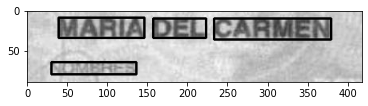

MARIA DEL CARMEN


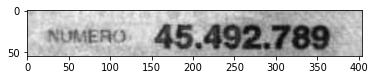

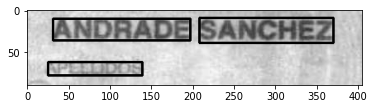

ANDRADE SANCHEZ


In [ ]:
results_dict={}
for j in range(len(detections)):
  x, y, w, h = convert2relative(image, detections[j][-1])
  if not detections[j][0] in names_to_extract_info:
    continue
  xmin=int((x-(w/2))*wmax)-int((0.05*(x-(w/2))*wmax))
  ymin=int((y-(h/2))*hmax)
  xmax=int((x+(w/2))*wmax)+int((0.05*(x+(w/2))*wmax))
  ymax=int((y+(h/2))*hmax)
  roi=img_cedula_raw[ymin:ymax,xmin:xmax,:]
  gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
  custom_config = r'--psm 6 --l spa'
  #text = pytesseract.image_to_string(gray,config=custom_config)
  d = pytesseract.image_to_data(gray,config=custom_config,output_type=Output.DICT)
  binary2=gray
  n_boxes = len(d['text'])
  extracted_text=[]
  ylist=[]
  hlist=[]
  for i in range(n_boxes):
      if int(d['conf'][i]) >= 0:
          (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
          extracted_text.append(d['text'][i])
          ylist.append(y)
          hlist.append(h)
          binary2 = cv2.rectangle(binary2, (x, y), (x + w, y + h), (0, 255, 0), 2)
  idx=[]
  plt.imshow(binary2,'gray')
  plt.show()  
  for yy in ylist:
    if abs(np.min(ylist)-yy)< np.max(hlist)/2:
      idx.append(True)
    else:
      idx.append(False)
  if detections[j][0]=='numero':
    real_info = [''.join(e for e in text if e.isnumeric()) for text,idx in zip(extracted_text,idx) if idx]
    real_info = ''.join(real_info)
  else:
    real_info = [''.join(e for e in text if e.isalnum()) for text,idx in zip(extracted_text,idx) if idx]
    real_info = ' '.join(real_info)
  print(real_info)
  results_dict[detections[j][0]]=real_info.upper()

In [ ]:
results_dict

# extraccion de datos de cedula .py

In [ ]:
#change paths!!!

%cd /content/drive/MyDrive/Proyectos/ADR_OCR/ARchivosBios/ARchivosBios/darknet/
!chmod -R +777 /content/drive/MyDrive/Proyectos/ADR_OCR/ARchivosBios/ARchivosBios/darknet

/content/drive/MyDrive/Proyectos/ADR_OCR/ARchivosBios/ARchivosBios/darknet


In [ ]:
!python extract_info_cedula.py --help

usage: extract_info_cedula.py [-h] [--input_file INPUT_FILE]
                              [--batch_size BATCH_SIZE] [--weights WEIGHTS]
                              [--config_file CONFIG_FILE]
                              [--data_file DATA_FILE] [--thresh THRESH]

YOLO Object Detection

optional arguments:
  -h, --help            show this help message and exit
  --input_file INPUT_FILE
                        image source. It can be a single image, atxt with
                        paths to them, or a folder. Image valid formats are
                        jpg, jpeg or png.If no input is given,
  --batch_size BATCH_SIZE
                        number of images to be processed at the same time
  --weights WEIGHTS     yolo weights path
  --config_file CONFIG_FILE
                        path to config file
  --data_file DATA_FILE
                        path to data file
  --thresh THRESH       remove detections with lower confidence


In [ ]:
##change paths here and darknet obj.data!!!
!python extract_info_cedula.py --input_file /content/drive/MyDrive/Proyectos/ADR_OCR/ARchivosBios/ARchivosBios/cedulacamy.jpeg \
  --batch_size 1 --weights /content/drive/MyDrive/Proyectos/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/yolov4_custom_best.weights \
  --config_file  /content/drive/MyDrive/Proyectos/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/yolov4_custom.cfg \
  --data_file /content/drive/MyDrive/Proyectos/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/obj.data \
  --thresh 0.25

 Try to load cfg: /content/drive/MyDrive/Proyectos/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/yolov4_custom.cfg, weights: /content/drive/MyDrive/Proyectos/ADR_OCR/ARchivosBios/ARchivosBios/Yolo/yolov4_custom_best.weights, clear = 0 
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   3 route  1 		                           ->  256 x 256 x  64 
   4 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   5 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   6 conv     64       3 x 3/ 1    256 x 256 x 